<a href="https://colab.research.google.com/github/DatumLearning/YOLOv10/blob/main/yolov10_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 631.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 5.9 MB/s eta 0:00:00


In [2]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

In [3]:
model = YOLO("yolov10n.pt")

100%|██████████| 5.59M/5.59M [00:00<00:00, 68.7MB/s]


In [4]:
results = model("/content/dog.jpg")


image 1/1 /content/dog.jpg: 480x640 1 bicycle, 1 car, 1 truck, 1 dog, 374.1ms
Speed: 17.2ms preprocess, 374.1ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)


In [7]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [8]:
dir(results[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_keys',
 'boxes',
 'cpu',
 'cuda',
 'keypoints',
 'masks',
 'names',
 'new',
 'numpy',
 'obb',
 'orig_img',
 'orig_shape',
 'path',
 'plot',
 'probs',
 'save',
 'save_crop',
 'save_dir',
 'save_txt',
 'show',
 'speed',
 'summary',
 'to',
 'tojson',
 'update',
 'verbose']

In [9]:
results[0].save("/content/final_image.jpg")

'/content/final_image.jpg'

In [32]:
img = cv2.imread("/content/dog.jpg")
boxes = results[0].boxes
names = results[0].names

for i , box in enumerate(results[0].boxes):
  cf = round(box.conf.numpy()[0] , 2)
  if cf < 0.5:
    continue
  x_min , y_min , x_max , y_max = box.xyxy.numpy().astype("int")[0]
  img = cv2.rectangle(img , (x_min , y_min) , (x_max , y_max) ,
                      (0 , 255 , 0) , 2)
  name = names[box.cls.numpy()[0].astype("int")]
  conf = str(round(box.conf.numpy()[0] , 2))
  print(name , conf)
  img = cv2.putText(img , (name + conf) , (x_min + 10 , y_min - 10) , cv2.FONT_HERSHEY_SIMPLEX , 0.5 ,
   (255, 0, 0) , 1 , cv2.LINE_AA)

bicycle 0.92
dog 0.9
truck 0.52


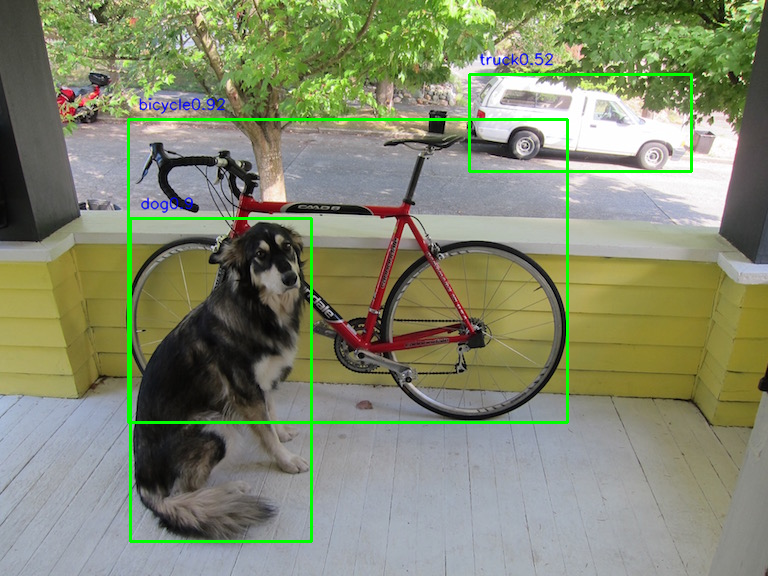

In [33]:
cv2_imshow(img)

In [30]:
for box in results[0].boxes:
  print(round(box.conf.numpy()[0] , 2) , "\n")

0.92 

0.9 

0.52 

0.48 



In [11]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou